# Linear Regression - Recap

In linear regression we want to find the coefficients $\theta_0$ and $\theta_1$ of the linear model
\begin{equation}
y = \theta_0 + \theta_1 x.
\end{equation}
This can be done by minimizing the cost function $J$
\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^n (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
\end{equation}
with respect to $\theta_0, \theta_1$, where we have $n$ training samples $(x^{(i)}, y^{(i)})$.

The cost function can also be written as
\begin{equation}
J(\vec{\theta}) = \frac{1}{2n} (X \vec{\theta} - \vec{y})^T (X \vec{\theta} - \vec{y})
\end{equation}
with 
\begin{equation}
X = 
\left(\begin{matrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
... & ... \\
1 & x^{(n)} \\
\end{matrix}\right),
\end{equation}

\begin{equation}
\vec{\theta} = 
\left(\begin{matrix}
\theta_0 \\
\theta_1
\end{matrix}\right)
\end{equation}

and

\begin{equation}
\vec{y} = 
\left(\begin{matrix}
y^{(1)} \\
y^{(2)} \\
... \\
y^{(n)}
\end{matrix}\right).
\end{equation}
Minimization of $J(\vec{\theta})$ shows that the optimal coefficents are
\begin{equation}
\vec{\theta}_\text{opt} = (X^TX)^{-1} X^T \vec{y}
\end{equation}

https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5

### Modelling of non-linear data
Linear regression is a great concept because there is an easy way to find the best solution but most real life problems are nonlinear and LR gives in these cases often useless results. We can improve the model by allowing nonlinear terms in the matrix $X$. E.g.
\begin{equation}
X = 
\left(\begin{matrix}
1 & x^{(1)} & (x^{(1)})^2 \\
1 & x^{(2)} & (x^{(2)})^2 \\
1 & x^{(3)} & (x^{(3)})^2 \\
\end{matrix}\right)
\end{equation}
allows us to find the coefficients for a quadratic fit with the approach used for linear case (I think that's really cool!)

In [5]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

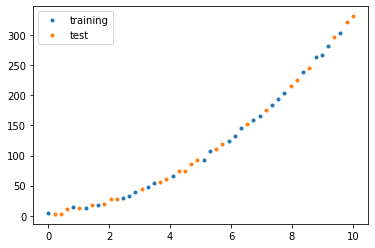

In [3]:
x = np.linspace(0, 10, 50)
noise = np.random.uniform(1e-1,1,len(x))
y = 1 + 2.5*x + 3*x**2 + 10*noise

x_train, x_test , y_train, y_test = train_test_split(x,y, train_size=0.5)
plt.plot(x_train, y_train,'.', label='training')
plt.plot(x_test, y_test,'.', label='test')
plt.legend()

### Preprocessing

In [4]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

poly2 = PolynomialFeatures(degree=2)
x2_train = poly2.fit_transform(x_train)
x2_test = poly2.fit_transform(x_test)

### Training

In [5]:
lm_linear = linear_model.LinearRegression(fit_intercept=True)
linear_fit = lm_linear.fit(x_train, y_train)

lm_quadratic = linear_model.LinearRegression(fit_intercept=True)
quadratic_fit = lm_quadratic.fit(x2_train,y_train)

### Testing

In [6]:
linear_pred = linear_fit.predict(x_test)
mae_lin = (np.abs(linear_pred-y_test)).mean()
quad_pred = quadratic_fit.predict(x2_test)
mae_quad = (np.abs(quad_pred-y_test)).mean()

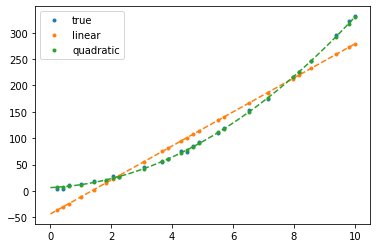

In [7]:
# sorting
plt.plot(x_test, y_test, '.', label = 'true')
plt.plot(x_test, linear_pred, '.', label = 'linear')
plt.plot(np.linspace(0,10,50), linear_fit.predict(np.linspace(0,10,50).reshape(-1,1)), '--', color='tab:orange')
plt.plot(x_test, quad_pred, '.', label = 'quadratic')
plt.plot(np.linspace(0,10,50), quadratic_fit.predict(poly2.fit_transform(np.linspace(0,10,50).reshape(-1,1))), '--', color='tab:green')

#plt.plot(x_test, crazy_fit.predict(x10_test), '.', label = '10th order')
#plt.plot(np.linspace(0,5,50), crazy_fit.predict(poly10.fit_transform(np.linspace(0,5,50).reshape(-1,1))), '--', color='tab:red')

plt.legend()

In [8]:
print(f'Error linear = {mae_lin}')
print(f'Error quadratic = {mae_quad}')

Error linear = 21.23579265417197
Error quadratic = 2.055799472914335


In general we map an input vector $\vec{x}^{(i)}$ into a $k$-dimensional feature space $\vec{\Phi} (\vec{x}^{(i)})$
\begin{equation}
X = 
\left(\begin{matrix}
\Phi_0 (x^{(1)}) & \Phi_1 (x^{(1)}) & \Phi_2 (x^{(1)}) & ... & \Phi_{k-1} (x^{(1)}) \\
\Phi_0 (x^{(2)}) & \Phi_1 (x^{(2)}) & \Phi_2 (x^{(2)}) & ... & \Phi_{k-1} (x^{(2)}) \\
... & ... & ... & ... & ... \\
\Phi_0 (x^{(n)}) & \Phi_1 (x^{(n)}) & \Phi_2 (x^{(n)}) & ... & \Phi_{k-1} (x^{(n)}) \\
\end{matrix}\right)
\end{equation}

The mapping into the feature space allows the description of non-linear relations but it can also lead to overfitting because

### Overfitting is a problem of models with many parameters

Error 10th-order polynom = 4.2034479750891345


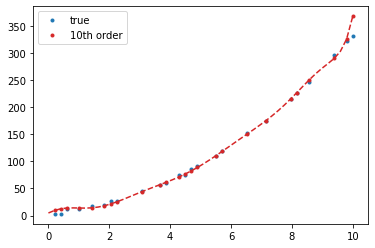

In [9]:
poly10 = PolynomialFeatures(degree=10)
x10_train = poly10.fit_transform(x_train)
x10_test = poly10.fit_transform(x_test)

lm_crazy = linear_model.LinearRegression(fit_intercept=True)
crazy_fit = lm_crazy.fit(x10_train,y_train)
crazy_pred = crazy_fit.predict(x10_test)
mae_crazy = (np.abs(crazy_pred-y_test)).mean()

plt.plot(x_test, y_test, '.', label = 'true')
plt.plot(x_test, crazy_pred, '.', label = '10th order', color='tab:red')
plt.plot(np.linspace(0,10,50), crazy_fit.predict(poly10.fit_transform(np.linspace(0,10,50).reshape(-1,1))), '--', color='tab:red')
plt.legend()

print(f'Error 10th-order polynom = {mae_crazy}')

A regression model cannot distinguish noise and signal, it just tries to make the best fit of the data.

We assume that the noise has a very complex relation to the input $x$ (because it is not correlated to $x$) while the relation between $x$ and signal is much simpler.

Thus, a simple model has not the flexibility to describe the noise but can only model the simpler relation between $x$ and the signal.
In contrast, a complex model can fit both the signal and the noise, which is overfitting.
Because input and noise are not correlated this leads to a large test error

One way of preventing overfitting is the use of less parameters. But this throws away some valuable information about the system. Also if there are many parameters with a small but equally large contribution, which should we neglect. Another (better) solution to avoid overfitting is regularization. Regularization is based on the observation that:

### A model is less prone to overfitting if the values of the parameter are smaller
This can apparently be shown with Bayesian statistics but an easier somewhat handwavy explanation is that a complex model can be converted into a simple model by making some parameters very small or setting them even to zero.

https://www.coursera.org/lecture/machine-learning/cost-function-B1MnL

https://stackoverflow.com/questions/34569903/how-does-having-smaller-values-for-parameters-help-in-preventing-over-fitting


We can enforce small coefficients by adding a penalty term to the loss function
\begin{equation}
J(\vec{\theta}) = \frac{1}{2n} (X \vec{\theta} - \vec{y})^T (X \vec{\theta} - \vec{y}) + \lambda \vec{\theta}^T \vec{\theta}.
\end{equation}
The coefficients are then given by
\begin{equation}
\vec{\theta}_\text{opt, ridge} = (X^TX +\lambda I)^{-1} X^T \vec{y}.
\end{equation}

Error 10th-order polynom = 4.2034479750891345
Error 10th-order polynom regularized = 2.6033372247895965


/home/misa/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.95248e-21): result may not be accurate.
  overwrite_a=True).T


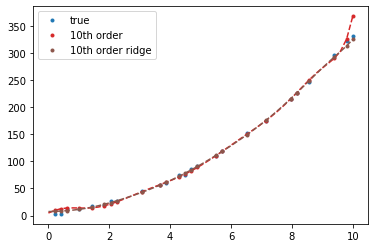

In [10]:
lm_crazy_reg = linear_model.Ridge()
crazy_fit_reg = lm_crazy_reg.fit(x10_train,y_train)
crazy_pred_reg = crazy_fit_reg.predict(x10_test)
mae_crazy_reg = (np.abs(crazy_pred_reg-y_test)).mean()

plt.plot(x_test, y_test, '.', label = 'true')
plt.plot(x_test, crazy_pred, '.', label = '10th order', color='tab:red')
plt.plot(np.linspace(0,10,50), crazy_fit.predict(poly10.fit_transform(np.linspace(0,10,50).reshape(-1,1))), '--', color='tab:red')

plt.plot(x_test, crazy_pred_reg, '.', label = '10th order ridge', color='tab:brown')
plt.plot(np.linspace(0,10,50), crazy_fit_reg.predict(poly10.fit_transform(np.linspace(0,10,50).reshape(-1,1))), '--', color='tab:brown')

plt.legend()

print(f'Error 10th-order polynom = {mae_crazy}')
print(f'Error 10th-order polynom regularized = {mae_crazy_reg}')

### The Kernel-trick
Besides overfitting, another problem is, that the mapping into the high-dimensional feature space can require a large computational effort or can be even impossible for an infinite-dimensional feature space. The Kernel trick allows us to work in these high-dimensional spaces without an explicit mapping of the input vectors. Before we can apply the Kernel trick we must go from the so called primal representation to the dual representation.
In the primal representation the label $y'$ is predicted from
\begin{equation}
y' = \vec{\theta}^T \vec{x}'
\end{equation}
and the coefficients are calculated as shown above.
$\vec{\theta}$ can also be written as
\begin{equation}
\vec{\theta} = X^T (X X^T + \lambda I)^{-1} Y
\end{equation}
and inserting this yields
\begin{equation}
y' = \vec{x}'^T \vec{\theta} = \vec{x}'^T X^T (X X^T + \lambda I)^{-1} Y
\end{equation}
with
\begin{equation}
\vec{x}'^T X^T = \left(\begin{matrix} \sum_{i=1}^{k-1} \phi_i(x') \phi_i(x^{(1)}) & \sum_{i=1}^{n} \phi_i(x') \phi_i(x^{(2)}) & ... \end{matrix}\right) = k(x', X)
\end{equation}
The elements of $\vec{x}'^T X^T$ are scalar products between $x'$ and $x^{(i)}$ in the feature space. In addition, the elements of the matrix
\begin{equation}
K_{ij} = (X X^T)_{ij} = \langle \Phi(x^{(i)}), \Phi(x^{(j)}) \rangle
\end{equation}
are also the scalar products between $x^{(i)}$ and $x^{(j)}$ in feature space. This is the dual representation. So far, we still must map the input into the feature space (expensive) where we calculate the scalar product. However, it is also possible to calculate the scalar product using the inputs $x_i$ and $x_j$ directly without transformation to the feature space. This is the kernel trick.

https://stats.stackexchange.com/questions/92672/difference-between-primal-dual-and-kernel-ridge-regression/134068

The coefficients can be obtained by solving

$$\vec{\theta} = (K + \lambda I)^{-1} Y $$

and the predicted label $y'$ of input $\vec{x}'$ is

$$ y' = \sum_i \theta_i k(\vec{x}_i, \vec{x}') $$

### Summary
- input is mapped into high-dimensional feature space with non-linear features $\rightarrow$ modelling of non-linear relations between input and outout possible
- high-dimensional model is prone to overfitting $\rightarrow$ use of regularizer (ridge regression)
- mapping in high-dimensional space expensive/impossible $\rightarrow$ Kernel trick allows the use of high-dimensional feature space without explict mapping of input into this space

### Popular Kernels

For radial or stationary kernels the value of kernel element depends only on the distance between the input vectors. The two most significant radial kernels are 

the **Gaussian Kernel**
\begin{equation}
K(\vec{x},\vec{y}) = e^{-\frac{|| \vec{x} - \vec{y} ||^2}{2 \sigma^2}}
\end{equation}

and the **Laplacian Kernel**
\begin{equation}
K(\vec{x},\vec{y}) = e^{-\frac{| \vec{x} - \vec{y} |}{\sigma}}.
\end{equation}

Another important calls are **polynomial kernels**
\begin{equation}
K(\vec{x},\vec{y}) = (\alpha \vec{x}^T\vec{y} + c)^d.
\end{equation}
The kernel value depends not only on the relative distance between the inputs but also their absolute values. This type of kernel is called non-stationary.
For
\begin{equation}
\alpha = c = d = 1
\end{equation}
the polynomial kernel is linear and identical to $y_i = a x_i + b$.

https://www.futurelearn.com/info/courses/advanced-machine-learning/0/steps/49560

## Hyperparameters
If the kernel width $\sigma$ is too small the model has a low training error but a high test error because the model only sees the interval very close to every training point. If the kernel width is too large everything looks the same and the predictions are weighted average of the training inputs.

In [6]:
from sklearn.metrics.pairwise import polynomial_kernel

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel

In [7]:
x_train = np.arange(5)/8*np.pi
y_train = np.cos(x_train)

test_x = np.linspace(0, np.pi/2, 1000)

lam = 1e-14

gamma_small = 1/(2*0.01**2)
small_sigma_train = rbf_kernel(x_train.reshape(-1,1), gamma=gamma_small)
coeffs_small = np.linalg.inv((small_sigma_train + 1e-14*np.identity(len(x_train))))@y_train
small_test = rbf_kernel(test_x.reshape(-1,1), x_train.reshape(-1,1), gamma=gamma_small)@coeffs_small

gamma_medium = 1/(2*0.5**2)
medium_sigma_train = rbf_kernel(x_train.reshape(-1,1), gamma=gamma_medium)
coeffs_medium = np.linalg.inv((medium_sigma_train + 1e-14*np.identity(len(x_train))))@y_train
medium_test = rbf_kernel(test_x.reshape(-1,1), x_train.reshape(-1,1), gamma=gamma_medium)@coeffs_medium

gamma_large = 1/(2*(1e4)**2)
large_sigma_train = rbf_kernel(x_train.reshape(-1,1), gamma=gamma_large)
coeffs_large = np.linalg.inv((large_sigma_train + 1e-14*np.identity(len(x_train))))@y_train
large_test = rbf_kernel(test_x.reshape(-1,1), x_train.reshape(-1,1), gamma=gamma_large)@coeffs_large

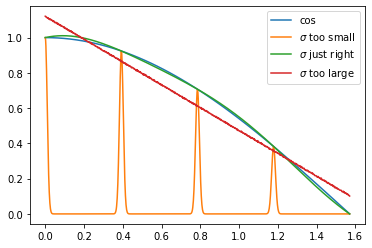

In [8]:
x = np.linspace(0, np.pi/2)
y = np.cos(x)
plt.plot(x,y, label = 'cos')

plt.plot(test_x,small_test, label=r'$\sigma$ too small')

plt.plot(test_x,medium_test, label=r'$\sigma$ just right')

plt.plot(test_x,large_test, label=r'$\sigma$ too large')

plt.legend()

The kernel width $\sigma$ can be calculated by a grid search. The size of the regularization parameter should be in the order of the noise (for data from QM calculation often a value around $10^{-7}$ is chosen).

# Classification vs Regression

In classification the output is discrete while it is continous in regression. For a binary classifier space is divided by a (hyper) plane into two regions. The region into which an input is mapped determines the class or label of the input. 


Support vector machines offer a way to find the "best" hyperplane:
- input vectors $\vec{x}_i$ 
- ouputs $\{-1, 1\}$
- cost function $J(\vec{w}) = \frac{1}{n} \sum_{i=1}^n \max[0, 1-y_i(\vec{w}^T \vec{x}_i - b )]$

Datapoints with $y_i = 1$ and $(\vec{w}^T \vec{x}_i - b ) > 1$ or $y_i = -1$ and $(\vec{w}^T \vec{x}_i - b ) < -1$ do not influence the weights. These are points that lie far away from the boundary. The weights $\vec{w}$ depend only on the points close to the hyperplane. These points are called support vectors.

- Support vector regression applies the support vector problem to regression 
- not all datapoints are used to determine the coefficients